In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout
from keras import optimizers,regularizers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")


Using TensorFlow backend.


In [67]:
train=pd.read_csv(r'C:\Users\My PC\Downloads\Dataset\Train.csv')
test=pd.read_csv(r'C:\Users\My PC\Downloads\Dataset\Test.csv')

In [54]:
submission=pd.read_csv(r'C:\Users\My PC\Downloads\Dataset\sample_submission.csv')

In [75]:
test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [69]:
INC=test['INCIDENT_ID']

In [70]:
test.drop(['INCIDENT_ID','DATE'],axis=1,inplace=True)

In [76]:
test['X_12'].fillna(1,inplace=True)

In [26]:
train['X_12'].isna().sum()

0

In [5]:
train.isnull().sum().sum()

182

In [27]:
train.head(1)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0


In [8]:
train.drop(['INCIDENT_ID','DATE'],axis=1,inplace=True)

In [28]:
train_df, test_df = train_test_split(train, test_size = 0.25, random_state= 1984)

In [29]:
train_early_stop, valid_early_stop = train_test_split(train_df, test_size= 0.5, random_state= 7)

In [30]:
train_y = train_df.MULTIPLE_OFFENSE
test_y = test_df.MULTIPLE_OFFENSE

train_x = train_df.drop(['MULTIPLE_OFFENSE'], axis = 1)
test_x = test_df.drop(['MULTIPLE_OFFENSE'], axis = 1)

In [82]:
print('Building Neural Network model...')
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam = optimizers.adam(lr = 0.005, decay = 0.00000001)

model=Sequential()
model.add(Dense(24,input_dim=train_x.shape[1],kernel_initializer='uniform',activation='elu'))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])
history = model.fit(train_x, train_y, validation_split=0.2, epochs=15, batch_size=32)


Building Neural Network model...
Train on 14313 samples, validate on 3579 samples
Epoch 1/15
14313/14313 [==============================] - 4s 314us/step - loss: 0.1698 - accuracy: 0.9538 - val_loss: 0.1388 - val_accuracy: 0.9595
Epoch 2/15
14313/14313 [==============================] - 2s 123us/step - loss: 0.1554 - accuracy: 0.9568 - val_loss: 0.1320 - val_accuracy: 0.9614
Epoch 3/15
14313/14313 [==============================] - 1s 95us/step - loss: 0.1410 - accuracy: 0.9581 - val_loss: 0.1201 - val_accuracy: 0.9628
Epoch 4/15
14313/14313 [==============================] - 1s 85us/step - loss: 0.1365 - accuracy: 0.9599 - val_loss: 0.1133 - val_accuracy: 0.9662
Epoch 5/15
14313/14313 [==============================] - 1s 83us/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1187 - val_accuracy: 0.9631
Epoch 6/15
14313/14313 [==============================] - 1s 84us/step - loss: 0.1197 - accuracy: 0.9612 - val_loss: 0.1041 - val_accuracy: 0.9665
Epoch 7/15
14313/14313 [==========

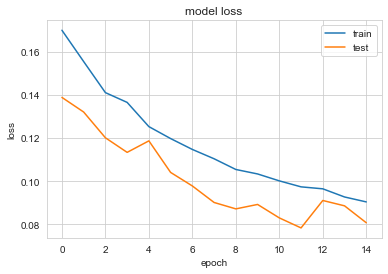

In [83]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [84]:
predictions_NN_prob = model.predict(test_x)

In [85]:
predictions_NN_prob[1]

array([0.98620427], dtype=float32)

In [86]:
pred=model.predict(test)

In [87]:
pred_NN_prob[1]

0.99540764

In [88]:
pred_NN_prob = pred[:,0]

In [80]:
pred_NN_01 = np.where(pred_NN_prob > 0.5, 1, 0)

In [89]:
submission.INCIDENT_ID = INC
submission.MULTIPLE_OFFENSE=pred_NN_01
submission.to_csv(r'C:\Users\My PC\Downloads\Dataset\submissionN3.csv', index=False)

In [90]:
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0)

In [91]:
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.9664654594232059


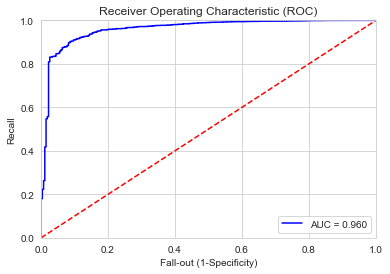

In [36]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()